# Estimations 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_base = "../shared_data_read_only/"
data = "./data/final_data.csv"
files = ("Business Account.xlsx","consumer_price_index.xlsx","Contacts.xlsx","Invoice and Opportunities.xlsx","Opportunities.xlsx","Non-Stock Items.xlsx","Items and Opportunities.xlsx")
alldata = pd.read_csv(data)
business_account = pd.read_excel(data_base+files[0])
consumer_prices = pd.read_excel(data_base+files[1])
contacts = pd.read_excel(data_base+files[2])
invoices = pd.read_excel(data_base+files[3])
opportunities = pd.read_excel(data_base+files[4])
nonstockitems = pd.read_excel(data_base+files[5])
itemsandopp = pd.read_excel(data_base+files[6])

In [3]:
dataact = alldata[["Opportunity ID","Activity sector"]]

In [4]:
dataact.shape

(8022, 2)

In [91]:
data_train = opportunities.dropna(subset = ["Amount received"])
data_train = data_train[data_train.Stage == "Won"]

In [92]:
data_train = data_train.merge(dataact,how='inner',on='Opportunity ID')
data_train = data_train.drop_duplicates()

In [93]:
data_train["Activity sector"]  = data_train["Activity sector"].astype('str')

In [94]:
names = [data_train["Activity sector"].values[i].split(' - ')[0] if data_train["Activity sector"].values[i].split(' - ')[0] != "SECTEUR PUBLIC" else "PUBLIC SECTOR" for i in range(data_train["Activity sector"].shape[0])]

In [95]:
data_train["Activity sector"] = names

In [99]:
sectors = data_train["Activity sector"].value_counts()

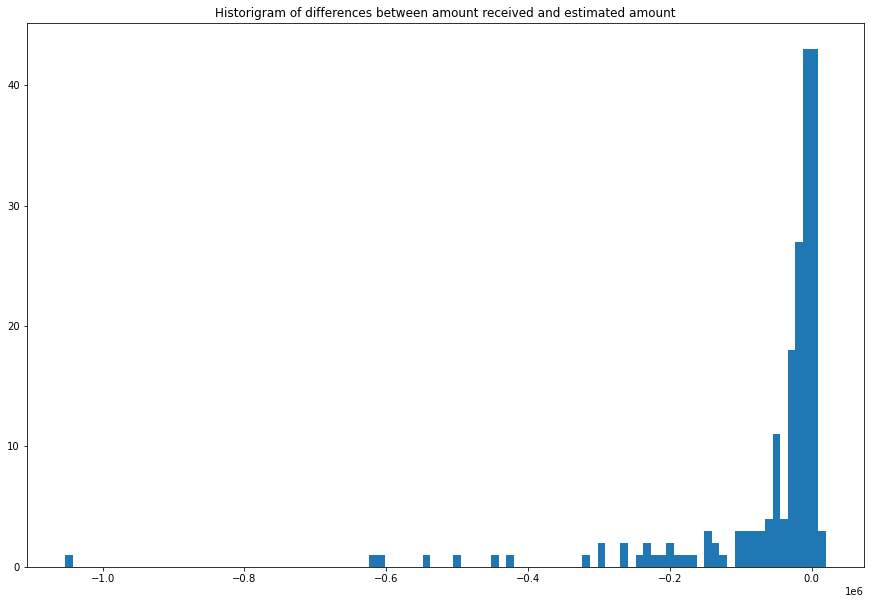

In [101]:
plt.figure(figsize = (15,10))
plt.hist(data_train.Difference[(data_train.Difference > -2*10e5) & (data_train.Difference < 30000) & (data_train.Difference != 0)],bins=100)
plt.title("Historigram of differences between amount received and estimated amount")
plt.show()

## Sectors analysis 

In [106]:
(sectors.values[1] / sectors.values.sum()) * 100

14.160516605166052

In [107]:
(sectors.values[2] / sectors.values.sum()) * 100

10.055350553505535

In [108]:
(sectors.values[3] / sectors.values.sum()) * 100

9.40959409594096

In [109]:
(sectors.values[4] / sectors.values.sum()) * 100

7.656826568265683

In [110]:
sectors

nan                        343
INSURANCE                  307
PUBLIC SECTOR              218
INDUSTRIES                 204
HEALTH                     166
COMPUTING                  112
TRANSPORT                  103
MEDIA                       98
BUSINESS ADMINISTRATION     86
BTP                         84
AGRI-FOOD                   73
COMMERCE                    66
REAL ESTATE                 58
HOTEL                       48
ENERGY                      45
HR                          36
LAW                         35
ARCHITECTURE                22
ARMY                        16
COMMUNICATION               16
MAINTENANCE                 12
EDUCATION                   11
CUSTOMER RELATIONS           9
Name: Activity sector, dtype: int64

In [112]:
data_train_sectors = data_train.copy()
data_train_sectors.index = data_train_sectors["Activity sector"]

In [113]:
data_train_sectors = data_train_sectors[["Estimated amount","Amount received","Difference"]]

In [114]:
data_train_sectors

,Estimated amount,Amount received,Difference
Activity sector,,,
HEALTH,9000.0,9000.00,0.00
nan,7620.0,7620.00,0.00
INSURANCE,30000.0,30000.00,0.00
nan,320.0,320.00,0.00
nan,320.0,320.00,0.00
...,...,...,...
INSURANCE,5000.0,5000.00,0.00
INDUSTRIES,20000.0,20000.00,0.00
MEDIA,130000.0,65000.00,-65000.00


In [120]:
mean_sectors = data_train_sectors.groupby(level = 0).mean()

In [121]:
sum_sectors = data_train_sectors.groupby(level = 0).sum()

In [122]:
sum_sectors.sort_values(by=["Amount received"],ascending=False)

,Estimated amount,Amount received,Difference
Activity sector,,,
PUBLIC SECTOR,17466168.30,12649380.93,-4816787.37
INSURANCE,9293637.69,6566140.99,-2727496.70
INDUSTRIES,6535442.85,5161308.35,-1374134.50
HEALTH,5053553.16,4723656.56,-329896.60
COMPUTING,1832683.07,1663034.66,-169648.41
MEDIA,2592701.30,1596963.47,-995737.83
AGRI-FOOD,1613005.80,1282804.20,-330201.60
BTP,1169494.25,1123994.25,-45500.00
nan,892492.32,866027.50,-26464.82


In [123]:
perf_sectors = 1 - sum_sectors["Amount received"] / sum_sectors["Estimated amount"]

In [124]:
perf_sectors

Activity sector
AGRI-FOOD                  0.204712
ARCHITECTURE               0.126573
ARMY                       0.000000
BTP                        0.038906
BUSINESS ADMINISTRATION    0.140175
COMMERCE                   0.155383
COMMUNICATION              0.000000
COMPUTING                  0.092568
CUSTOMER RELATIONS         0.000000
EDUCATION                  0.100998
ENERGY                     0.264834
HEALTH                     0.065280
HOTEL                      0.067071
HR                         0.289484
INDUSTRIES                 0.210259
INSURANCE                  0.293480
LAW                        0.260779
MAINTENANCE                0.000000
MEDIA                      0.384054
PUBLIC SECTOR              0.275778
REAL ESTATE                0.182485
TRANSPORT                  0.082823
nan                        0.029653
dtype: float64

In [125]:
earning_pie = sum_sectors["Amount received"].sort_values(ascending=False)
difference_pie = sum_sectors["Difference"].map(lambda x: abs(x)).sort_values(ascending=False)
percent_pie = perf_sectors.sort_values(ascending=False)

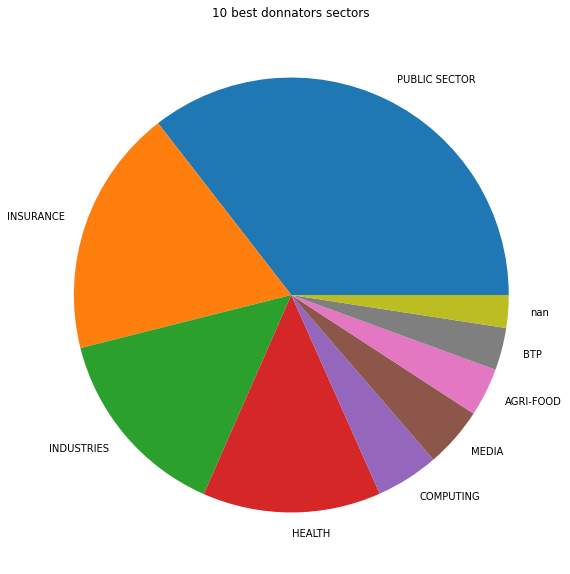

In [128]:
plt.figure(figsize=(10,10))
plt.pie(earning_pie.values[:],labels=earning_pie.index[:10])
plt.title("10 best donnators sectors")
plt.show()

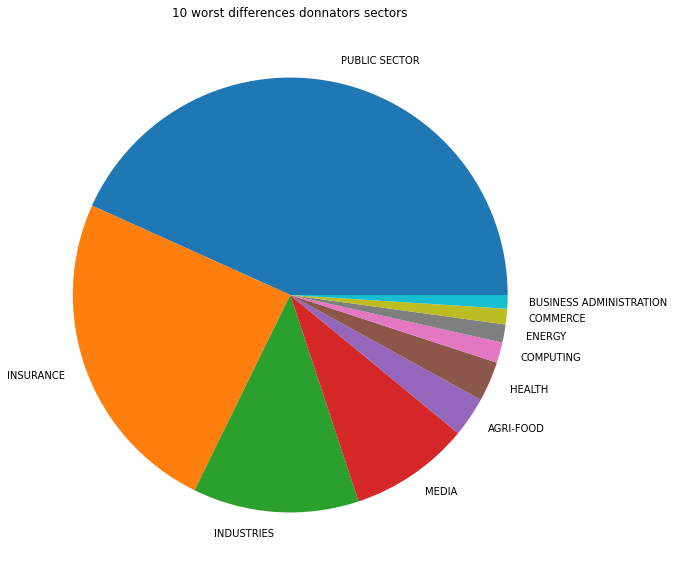

In [129]:
plt.figure(figsize=(10,10))
plt.pie(difference_pie.values[:10],labels=difference_pie.index[:10])
plt.title("10 worst differences donnators sectors")
plt.show()

In [132]:
percent_pie.mean()

0.14196931393805187

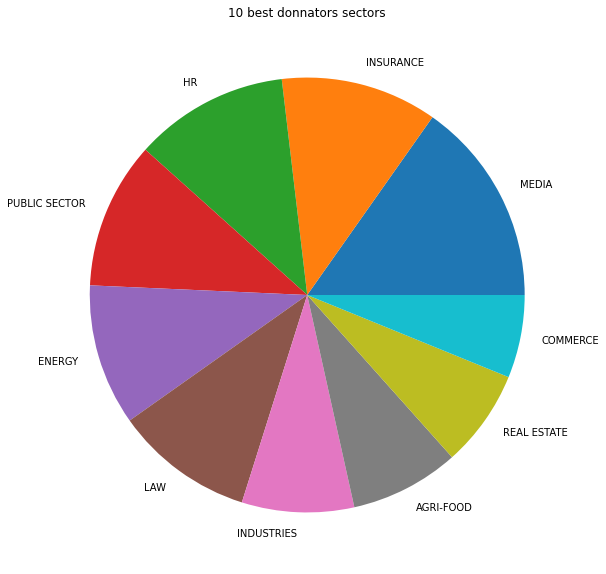

In [131]:
plt.figure(figsize=(10,10))
plt.pie(percent_pie.values[:10],labels=percent_pie.index[:10])
plt.title("10 best donnators sectors")
plt.show()

In [33]:
mean_sectors.sort_values(by = ["Difference"])

,Estimated amount,Amount received,Difference
Activity sector,,,
INDUSTRIES - Luxury goods,137913.740000,70135.962222,-67777.777778
"PUBLIC SECTOR - Local authorities, Regions, Municipalities",70936.285159,46642.991508,-24293.293651
SECTEUR PUBLIC - Etat & ses établissements publics,102748.548293,81786.420854,-20962.127439
"MEDIA - ARTS - SPORTS - Sports, Infrastructure, Clubs",40847.250870,22461.645870,-18385.605000
INDUSTRIES - Chemical industry,33238.478571,22381.335714,-10857.142857
"INSURANCE - BANKING - Banking, Insurance, Finance, Investment funds",30272.435472,21388.081401,-8884.354072
"INDUSTRIES - Fashion, Textiles, Leather, Clothing",48159.120889,39645.020889,-8514.100000
PUBLIC SECTOR - Political & Administrative Services,19744.353333,13381.713333,-6362.640000
"LAW - ECONOMICS - MANAGEMENT - Accounting, Management",16082.954706,10200.601765,-5882.352941


In [34]:
mean_sectors.sort_values(by = ["Estimated amount"],ascending=False)

,Estimated amount,Amount received,Difference
Activity sector,,,
INDUSTRIES - Luxury goods,137913.740000,70135.962222,-67777.777778
SECTEUR PUBLIC - Etat & ses établissements publics,102748.548293,81786.420854,-20962.127439
"PUBLIC SECTOR - Local authorities, Regions, Municipalities",70936.285159,46642.991508,-24293.293651
"INDUSTRIES - Fashion, Textiles, Leather, Clothing",48159.120889,39645.020889,-8514.100000
INDUSTRIES - Food industry,46186.686471,46363.157059,176.470588
"HEALTH - SOCIAL - Social, Associations, Foundations",45617.385213,42267.421383,-3349.963830
"MEDIA - ARTS - SPORTS - Sports, Infrastructure, Clubs",40847.250870,22461.645870,-18385.605000
MAINTENANCE - HYGIENE - BEAUTY,34111.930833,34111.930833,0.000000
INDUSTRIES - Chemical industry,33238.478571,22381.335714,-10857.142857


In [35]:
data_train_sectors.loc["INSURANCE - BANKING - Banking, Insurance, Finance, Investment funds",:]

,Estimated amount,Amount received,Difference
Activity sector,,,
"INSURANCE - BANKING - Banking, Insurance, Finance, Investment funds",30000.0,30000.0,0.0
"INSURANCE - BANKING - Banking, Insurance, Finance, Investment funds",6000.0,2000.0,-4000.0
"INSURANCE - BANKING - Banking, Insurance, Finance, Investment funds",5000.0,5000.0,0.0
"INSURANCE - BANKING - Banking, Insurance, Finance, Investment funds",20000.0,20000.0,0.0
"INSURANCE - BANKING - Banking, Insurance, Finance, Investment funds",12000.0,12000.0,0.0
...,...,...,...
"INSURANCE - BANKING - Banking, Insurance, Finance, Investment funds",20000.0,20000.0,0.0
"INSURANCE - BANKING - Banking, Insurance, Finance, Investment funds",20000.0,20000.0,0.0
"INSURANCE - BANKING - Banking, Insurance, Finance, Investment funds",40000.0,40000.0,0.0


In [36]:
data_train[data_train["Activity sector"] == "INDUSTRIES - Luxury goods"]

,Opportunity ID,Business Account,Contact ID,Estimated Close Date,Status,Stage,Probability,Estimated amount,Amount received,Difference,...,Theorical payment date 4,Theorical payment amount 4,Theorical payment date 5,Theorical payment amount 5,Created On,Last Modified Date,Actual Close Date,Assignment Date,Branch ID,Activity sector
102,5754,C15859,46745.0,2023-07-09,Won,Won,400,15000.00,15000.00,0.0,...,NaT,NaN,NaT,NaN,2023-06-09 09:42:07.687,2023-07-03 11:33:08.713,2023-07-03,2023-06-09 09:36:07.807,SDLV,INDUSTRIES - Luxury goods
533,4749,C00142,44225.0,2022-10-28,Won,Won,400,10000.00,10000.00,0.0,...,NaT,NaN,NaT,NaN,2022-10-28 09:35:41.693,2023-02-08 09:58:29.757,2023-02-08,2022-10-28 09:34:17.637,SDLV,INDUSTRIES - Luxury goods
1573,3735,C00142,42866.0,2022-04-21,Won,Won,600,7000.00,7000.00,0.0,...,NaT,NaN,NaT,NaN,2022-04-21 20:27:20.920,2023-01-06 12:10:19.593,2022-09-15,2022-04-21 20:25:51.380,SDLV,INDUSTRIES - Luxury goods
2310,2599,C04727,40607.0,2021-10-07,Won,Won,200,2000.00,2000.00,0.0,...,NaT,NaN,NaT,NaN,2021-10-07 15:30:49.627,2021-12-15 09:12:59.607,2021-12-15,2021-10-07 15:27:13.700,SDLV,INDUSTRIES - Luxury goods
2812,2118,C00852,NaN,2021-06-17,Won,Won,200,2500.00,2500.00,0.0,...,NaT,NaN,NaT,NaN,2021-06-17 15:44:08.500,2021-06-21 10:51:15.950,2021-06-21,2021-06-17 15:43:25.080,SDLV,INDUSTRIES - Luxury goods
2819,2111,C00142,NaN,2021-06-17,Won,Won,200,1666.66,1666.66,0.0,...,NaT,NaN,NaT,NaN,2021-06-17 15:35:54.613,2021-06-21 10:53:14.160,2021-06-21,2021-06-17 15:34:53.463,SDLV,INDUSTRIES - Luxury goods
3074,1938,C02140,39294.0,2021-05-26,Won,Won,200,287.00,287.00,0.0,...,NaT,NaN,NaT,NaN,2021-05-26 17:37:10.200,2021-06-21 11:19:11.290,2021-06-21,2021-05-26 17:36:50.167,SDLV,INDUSTRIES - Luxury goods
3152,1891,C00102,38926.0,2021-05-17,Won,Won,200,2770.00,2770.00,0.0,...,NaT,NaN,NaT,NaN,2021-05-17 10:34:40.020,2021-06-21 11:23:48.870,2021-06-21,2021-05-17 10:31:10.047,SDLV,INDUSTRIES - Luxury goods
3869,1427,C00142,35564.0,2022-01-01,New,Won,800,1200000.00,590000.00,-610000.0,...,2024-02-15,195.000 €,2024-08-15,195.000 €,2021-03-11 14:12:37.077,2023-10-02 16:13:36.023,NaT,2021-03-11 14:11:17.650,SDLV,INDUSTRIES - Luxury goods
